# An exploration of the cities I would find desirable to live in

This is a simple beginners' project to practice using the pandas and seaborn libraries. The objective is to find narrow down a list of cities with my personal preferences to find where I would most like to live. If you have any suggestions for improvements, they would be much appreciated! 

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import "quality of life" data and reformat country column by removing whitespace on lhs.

In [2]:
quality_of_life_filepath = "../input/city-quality-of-life-dataset/uaScoresDataFrame.csv"
quality_of_life_data = pd.read_csv(quality_of_life_filepath,index_col=0)
quality_of_life_data['UA_Country'] = quality_of_life_data['UA_Country'].str.lstrip()

In [3]:
quality_of_life_data.head()

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


Plot of the "cost of living" for all the data split across the continents. All the columns in the "quality of life" data are range from 0.0 - 10.0 with the larger numbers indicating higher desirability. For cost of living, we can see that the cities in Europe, North America and Asia have a large range in the "cost of living" whereas, Oceania is mid-range and South America and Africa are on average cheaper.    

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='UA_Continent', ylabel='Cost of Living'>

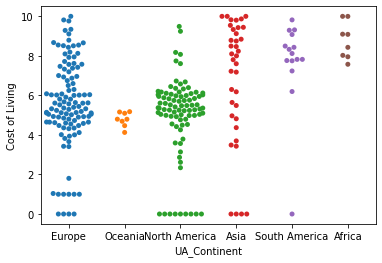

In [4]:
sns.swarmplot(x=quality_of_life_data["UA_Continent"],y=quality_of_life_data["Cost of Living"])

I calculated a score "Score_1" by weighting different columns from the "quality of life" data on how important each variable is to me. 

In [5]:
quality_of_life_data['Score_1'] = quality_of_life_data['Housing'] + quality_of_life_data['Cost of Living'] + (quality_of_life_data['Travel Connectivity']*0.9) + (quality_of_life_data['Safety']*0.9) + (quality_of_life_data['Healthcare']*0.8) + (quality_of_life_data['Education']*0.5) + (quality_of_life_data['Environmental Quality']*0.8) + (quality_of_life_data['Internet Access']*0.8) + (quality_of_life_data['Economy']*0.5) + (quality_of_life_data['Taxation']*0.5)+ (quality_of_life_data['Leisure & Culture']*2)+ (quality_of_life_data['Tolerance']*3) 

Plotting the distribution of scores across the continents, I can see that cities in Europe are on average scoring higher than the other continents and are more numerous. This is lucky as being European, I have a preference to stay within Europe.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='UA_Continent', ylabel='Score_1'>

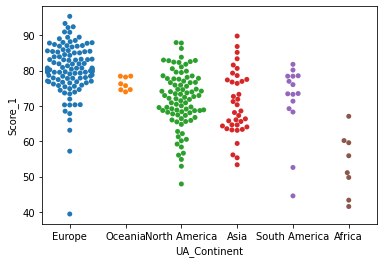

In [6]:
sns.swarmplot(x=quality_of_life_data["UA_Continent"],y=quality_of_life_data["Score_1"])

I limit the "quality of life" data down to Europe.

In [7]:
Europe_quality = quality_of_life_data.loc[quality_of_life_data.UA_Continent == 'Europe']
Europe_quality.head()

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Score_1
0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,...,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300,85.002017
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,...,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070,88.990267
6,Andorra,Andorra,Europe,3.9690,0.000,1.0000,0.000,0.5000,0.00000,0.000000,...,0.000000,0.0000,7.25600,0.0000,4.4750,7.186,2.1320,8.7035,3.5885,57.182750
10,Athens,Greece,Europe,9.0525,6.500,4.4040,2.325,3.7070,5.21975,6.169000,...,7.153000,3.1625,3.80225,3.3200,4.1665,2.228,7.8760,6.2680,6.4830,75.398550
18,Barcelona,Spain,Europe,6.3230,6.074,7.7585,5.655,5.8060,5.69925,7.119667,...,8.403333,5.0290,3.66550,4.2960,3.8940,6.468,8.5915,7.4715,5.8280,85.325617


In [8]:
Europe_quality_scored=Europe_quality.sort_values(by=['Score_1'],ascending=False)
Europe_quality_scored[0:10]

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Score_1
256,Vienna,Austria,Europe,6.3140,5.111,5.7980,3.635,8.0315,6.21325,7.596000,...,8.198000,4.8545,9.27000,4.6630,2.6660,6.1730,8.5215,8.9640,5.2945,95.329750
195,Prague,Czechia,Europe,7.4305,7.569,5.7795,2.302,5.4815,5.84650,6.212667,...,7.881000,4.2380,7.01425,4.3780,5.9335,6.0905,8.4645,8.1985,4.9010,93.314250
224,Seville,Spain,Europe,8.0955,6.961,1.1475,0.000,3.4770,5.56700,7.119667,...,8.221333,4.2595,7.22075,4.2960,3.8940,6.1895,7.4160,9.2650,3.0330,92.379367
135,Lisbon,Portugal,Europe,6.7340,7.004,6.0220,3.194,4.1910,5.31575,8.238667,...,7.860333,4.4800,6.41150,3.4830,4.1575,6.3940,7.8335,9.5970,5.6910,92.155017
44,Bucharest,Romania,Europe,9.1865,8.516,5.3830,1.187,3.4955,5.07250,5.681667,...,6.075333,2.4475,3.41925,4.1030,6.8390,9.6380,6.9595,8.6865,1.9675,90.915167
165,Munich,Germany,Europe,4.2300,4.648,6.9150,6.509,8.0565,6.01400,9.072333,...,8.371000,7.5545,9.01825,5.3735,3.9035,5.1550,7.3360,8.4745,7.3310,90.819600
145,Madrid,Spain,Europe,6.4140,6.249,0.0000,4.790,5.8555,5.28575,7.119667,...,8.916333,4.2915,5.56550,4.2960,3.8940,6.2410,9.3380,7.6650,6.2200,89.436217
69,Copenhagen,Denmark,Europe,4.2270,3.426,6.2070,4.467,6.3000,6.29550,9.940000,...,7.985333,5.3010,8.27225,4.8865,5.0680,7.2395,7.0630,9.0955,4.6710,89.398167
4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,...,7.907333,6.1800,7.59725,5.0530,4.9550,4.5230,8.8740,8.3680,5.3070,88.990267
252,Valencia,Spain,Europe,8.1355,6.872,1.7470,2.583,3.4840,5.80900,7.119667,...,8.885667,4.2660,5.94225,4.2960,3.8940,9.1400,7.0780,7.9350,6.3315,88.514283


I would like to live in a reasonably warm climate so import some data on the temperature of different cities and I separate out the Euopean cities.

In [9]:
world_temp_filepath = '../input/world-average-temperature/Avg_World_Temp_2020.csv'
world_temp_data = pd.read_csv(world_temp_filepath,index_col = 0)

Europe_temp = world_temp_data.loc[world_temp_data.Continent == "Europe"]
Europe_temp.replace(['North Macedonia'],['Macedonia'])

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg_Year,Continent
184,Albania,Tirana,6.7,7.8,10.0,13.4,18.0,21.6,24.0,23.8,20.7,16.0,11.7,8.1,15.2,Europe
185,Austria,Vienna,0.3,1.5,5.7,10.7,15.7,18.7,20.8,20.2,15.4,10.2,5.1,1.1,10.4,Europe
186,Belarus,Minsk,-4.5,-4.4,0.0,7.2,13.3,16.4,18.5,17.5,12.1,6.6,0.6,-3.4,6.7,Europe
187,Belgium,Brussels,3.3,3.7,6.8,9.8,13.6,16.2,18.4,18.0,14.9,11.1,6.8,3.9,10.5,Europe
188,Bosnia and Herzegovina,Sarajevo,-0.5,1.4,5.7,10.0,14.8,17.7,19.7,19.7,15.3,11.0,5.4,0.9,10.1,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Ukraine,Kiev,-3.5,-3.0,1.8,9.3,15.5,18.5,20.5,19.7,14.2,8.4,1.9,-2.3,8.4,Europe
242,Ukraine,Lviv,-3.1,-2.2,1.9,8.3,13.8,16.4,18.3,17.7,13.0,8.1,2.6,-1.8,7.8,Europe
243,Ukraine,Odessa,-0.5,-0.2,3.5,9.4,15.6,20.0,22.6,22.3,17.2,11.6,5.7,1.1,10.7,Europe
244,United Kingdom,Edinburgh,4.2,4.5,6.2,8.1,10.8,13.5,15.3,15.2,13.0,9.8,6.7,4.2,9.3,Europe


I take the mean of hottest two months of the year, July and August, to be the summer temperature and the mean of the coldest two, January and February, to be the winter temperature. 

I plot the average summer temperature against average winter temperature for these european cities and find a positive correlation, where cities with hotter summers tended to also have warmer winters.

Text(0.5, 1.0, 'Average summer and winter temperatures of European countries /°C')

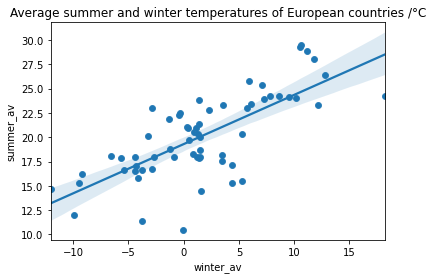

In [10]:
summer_av = Europe_temp.loc[:,['Jul','Aug']].mean(axis=1).to_frame(name="summer_av") 
winter_av = Europe_temp.loc[:,['Jan','Feb']].mean(axis=1).to_frame(name="winter_av") 

#Europe_temp
Europe_temp_score = Europe_temp.iloc[:,[0,1]]
Europe_temp_score = Europe_temp_score.join([summer_av,winter_av])
#Europe_temp_score

sns.scatterplot(x= Europe_temp_score['winter_av'], y= Europe_temp_score['summer_av'])
sns.regplot(x= Europe_temp_score['winter_av'], y= Europe_temp_score['summer_av'])
plt.title("Average summer and winter temperatures of European countries /\xb0C")

In [11]:
#Europe_temp['summer'] = Europe_temp.loc[:,['Jul','Aug']].mean(axis=1)
def summerscalefunc(row): 
    if row.summer_av > 27:
        return 4
    elif row.summer_av > 25:
        return 7
    elif row.summer_av > 21:
        return 10
    elif row.summer_av > 18:
        return 7
    elif row.summer_av > 15:
        return 5
    else:
         return 0
        
def winterscalefunc(row): 
    if row.winter_av <= -10:
        return 0
    elif row.winter_av <= -5:
        return 1
    elif row.winter_av <= 0:
        return 2
    elif row.winter_av <= 3:
        return 10
    elif row.winter_av <= 5:
        return 8
    else:
        return 6
summer_score = Europe_temp_score.apply(summerscalefunc, axis='columns').to_frame(name="summer_score")
winter_score = Europe_temp_score.apply(winterscalefunc, axis='columns').to_frame(name="winter_score")

Europe_temp_score = Europe_temp_score.join([summer_score,winter_score])
#Europe_temp_score

In [12]:
Europe_temp_score.loc[Europe_temp_score.Country == 'United Kingdom']

,Country,City,summer_av,winter_av,summer_score,winter_score
244,United Kingdom,Edinburgh,15.25,4.35,5,8
245,United Kingdom,London,17.15,4.40,5,8


I grouped the data by country and found the mean temperature score for each country in the summer and winter and created a dictionary. I used the dictionary values to add these tempertaure scores to the rest of my data in the Europe?quality dataframe. 

In [13]:
Country_T_summer = Europe_temp_score.groupby(['Country']).summer_score.mean().to_dict()
Country_T_winter = Europe_temp_score.groupby(['Country']).winter_score.mean().to_dict()

Europe_quality['summer_temp'] = Europe_quality['UA_Country'].map(Country_T_summer)
Europe_quality['winter_temp'] = Europe_quality['UA_Country'].map(Country_T_winter)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


I imported some UNESCO data as this is a good measure of cultural and natural sights in a country.

In [14]:
unesco_filepath = "../input/unesco-world-heritage-sites/whc-sites-2019.csv"
unesco_data = pd.read_csv(unesco_filepath,index_col="id_no")

Split country column such that when a UNESCO site is shared by multiple countries, each country had it's own entry. Then I counted the number of sites for each country and saved this as a dictionary which I used to add this data to the Europe_quality dataframe.

In [15]:
unesco_data_split = unesco_data.assign(states_name_en = unesco_data.states_name_en.str.split(',')).explode('states_name_en')
unesco_europe_NA_split = unesco_data_split.loc[unesco_data_split.region_en == "Europe and North America"]
unesco_europe_NA_split = unesco_europe_NA_split.replace(['United Kingdom of Great Britain and Northern Ireland','North Macedonia','Russian Federation','Republic of Moldova'],['United Kingdom','Macedonia','Russia','Moldova'])

unesco_counts = unesco_europe_NA_split.states_name_en.value_counts()
unesco_europe_D = unesco_counts.to_dict()

Europe_quality['unesco'] = Europe_quality['UA_Country'].map(unesco_europe_D)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


I assigned a score for the unesco data by scaling from 10-0 for the most sites to least. 

In [16]:
Europe_quality['unesco_scaled'] = Europe_quality.unesco.map(lambda u: u/55 * 10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


I added new parameters to Score_1 to create Score_2.

In [17]:
Europe_quality['Score_2'] = Europe_quality['Score_1'] + Europe_quality['unesco_scaled'] + Europe_quality['summer_temp'] + Europe_quality['winter_temp'] 
Europe_quality_scored = Europe_quality.sort_values(by=['Score_2'],ascending=False)
Europe_quality_scored[0:10]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Internet Access,Leisure & Culture,Tolerance,Outdoors,Score_1,summer_temp,winter_temp,unesco,unesco_scaled,Score_2
165,Munich,Germany,Europe,4.2300,4.648,6.9150,6.509,8.0565,6.01400,9.072333,...,5.1550,7.3360,8.4745,7.3310,90.819600,6.00,10.0,45.0,8.181818,115.001418
224,Seville,Spain,Europe,8.0955,6.961,1.1475,0.000,3.4770,5.56700,7.119667,...,6.1895,7.4160,9.2650,3.0330,92.379367,7.75,6.0,48.0,8.727273,114.856639
256,Vienna,Austria,Europe,6.3140,5.111,5.7980,3.635,8.0315,6.21325,7.596000,...,6.1730,8.5215,8.9640,5.2945,95.329750,7.00,10.0,10.0,1.818182,114.147932
26,Berlin,Germany,Europe,6.3950,5.524,9.0850,7.820,7.0250,6.19600,9.072333,...,4.6780,8.8810,7.1775,5.4750,87.762483,6.00,10.0,45.0,8.181818,111.944302
145,Madrid,Spain,Europe,6.4140,6.249,0.0000,4.790,5.8555,5.28575,7.119667,...,6.2410,9.3380,7.6650,6.2200,89.436217,7.75,6.0,48.0,8.727273,111.913489
135,Lisbon,Portugal,Europe,6.7340,7.004,6.0220,3.194,4.1910,5.31575,8.238667,...,6.3940,7.8335,9.5970,5.6910,92.155017,10.00,6.0,17.0,3.090909,111.245926
252,Valencia,Spain,Europe,8.1355,6.872,1.7470,2.583,3.4840,5.80900,7.119667,...,9.1400,7.0780,7.9350,6.3315,88.514283,7.75,6.0,48.0,8.727273,110.991556
28,Bilbao,Spain,Europe,6.8880,5.638,2.6680,0.000,4.1735,5.77475,7.119667,...,5.7560,6.0140,8.6630,1.4810,86.899833,7.75,6.0,48.0,8.727273,109.377106
79,Dresden,Germany,Europe,7.8845,6.028,2.4065,1.533,3.5360,4.96000,9.072333,...,5.6035,6.6385,7.3690,4.6490,84.983583,6.00,10.0,45.0,8.181818,109.165402
45,Budapest,Hungary,Europe,8.5705,7.948,5.4935,2.804,4.4265,5.39500,6.708000,...,6.7590,8.2530,7.2280,5.1120,87.696250,10.00,10.0,8.0,1.454545,109.150795


Salaries also fluctuate between countries so I imported some data on average salaries in the EU.

In [18]:
salaries_filepath = "../input/average-eu-salaries/EU_av_salaries.csv"
salaries = pd.read_csv(salaries_filepath,encoding='latin1')

salaries.rename(columns={'Gross Salary euro': 'Gross', 'Net Salary euro': 'Net'}, inplace=True)

Plot distribution of average national gross and net salaries for european countries. You can see that the tax taken from the gross to give the net, narrows the distribution, showing the tax applied by the countries differ. So I will focus on the gross salary since I already have a tax variable in Score_1.  

Text(0.5, 0, 'Average salary')

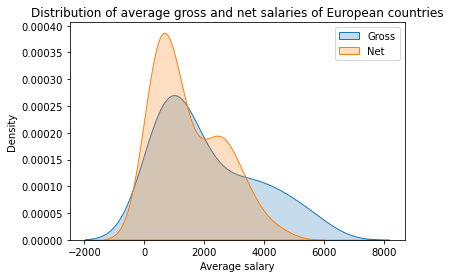

In [19]:
sns.kdeplot(data = salaries['Gross'],shade = True, label = 'Gross')
sns.kdeplot(data = salaries['Net'],shade = True, label = 'Net')
plt.title("Distribution of average gross and net salaries of European countries")
plt.legend()
plt.xlabel("Average salary") 

I create a dictionary of average monthly gross salaries by country and add this data to the Europe_quality dataframe.  

In [20]:
monthly_gross = pd.Series(salaries.Gross.values, salaries.Country).to_dict()

Europe_quality['salary'] = Europe_quality['UA_Country'].map(monthly_gross)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


I plot a chart of salary against Score_2, which also distingues whether there is my ideal climate. There is a slight correlation between the happiness score and the salary (money does buy happiness to some extent) but with a large confidence level. 

Text(0.5, 1.0, 'Average monthly gross salary against my happiness score of European countries')

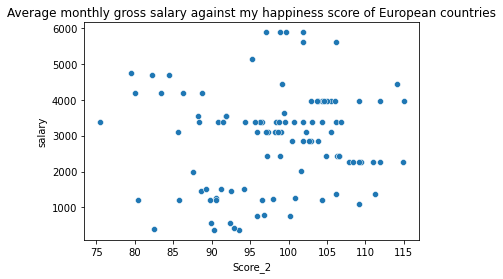

In [21]:
sns.scatterplot(x= Europe_quality['Score_2'], y= Europe_quality['salary']) 
plt.title('Average monthly gross salary against my happiness score of European countries')

Create a dataframe of desirable cities by limiting the data to those who score above 100 on the happiness score and with a monthly gross national salary of above 2400 euros.  

In [22]:
desirable_cities = Europe_quality.loc[(Europe_quality.Score_2 > 100) & (Europe_quality.salary >= 2400)].sort_values(by = ['Score_2'], ascending = False).reset_index()
desirable_cities[0:10]

,index,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Leisure & Culture,Tolerance,Outdoors,Score_1,summer_temp,winter_temp,unesco,unesco_scaled,Score_2,salary
0,165,Munich,Germany,Europe,4.2300,4.648,6.9150,6.509,8.0565,6.01400,...,7.3360,8.4745,7.3310,90.819600,6.0,10.0,45.0,8.181818,115.001418,3978.0
1,256,Vienna,Austria,Europe,6.3140,5.111,5.7980,3.635,8.0315,6.21325,...,8.5215,8.9640,5.2945,95.329750,7.0,10.0,10.0,1.818182,114.147932,4451.0
2,26,Berlin,Germany,Europe,6.3950,5.524,9.0850,7.820,7.0250,6.19600,...,8.8810,7.1775,5.4750,87.762483,6.0,10.0,45.0,8.181818,111.944302,3978.0
3,79,Dresden,Germany,Europe,7.8845,6.028,2.4065,1.533,3.5360,4.96000,...,6.6385,7.3690,4.6490,84.983583,6.0,10.0,45.0,8.181818,109.165402,3978.0
4,136,Liverpool,United Kingdom,Europe,7.4850,6.020,3.5590,2.355,6.6495,4.54100,...,5.3930,7.4510,5.4585,87.953983,5.0,8.0,32.0,5.818182,106.772165,3381.0
5,157,Milan,Italy,Europe,5.1945,4.801,5.1905,3.286,6.6830,5.51200,...,7.9170,7.2195,5.6410,79.517233,10.0,7.0,55.0,10.000000,106.517233,2446.0
6,87,Florence,Italy,Europe,6.7750,4.649,2.2275,0.000,4.3060,6.02875,...,8.5035,6.7355,1.6770,79.507983,10.0,7.0,55.0,10.000000,106.507983,2446.0
7,33,Bologna,Italy,Europe,7.4720,5.189,3.1485,1.397,3.6820,5.53000,...,5.7360,7.6180,1.5815,79.303583,10.0,7.0,55.0,10.000000,106.303583,2446.0
8,69,Copenhagen,Denmark,Europe,4.2270,3.426,6.2070,4.467,6.3000,6.29550,...,7.0630,9.0955,4.6710,89.398167,5.0,10.0,10.0,1.818182,106.216348,5607.0
9,83,Edinburgh,United Kingdom,Europe,5.8450,5.114,4.1090,3.337,5.1850,5.96750,...,7.2005,7.9220,5.1310,87.364167,5.0,8.0,32.0,5.818182,106.182348,3381.0


I notice there are still some cities that are too cold for my liking in the list of the most desiable so I create a variable defining whether a country has a good climate or not based on the scores it attained for the summer and temperature. Warm in the summer but still with a proper winter, but not too much sub-zero! 

In [23]:
Europe_quality['good climate'] = (Europe_quality['summer_temp'] > 5) & (Europe_quality['winter_temp'] >2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Final list of my most desirable cities are given here!

In [24]:
desirable_cities_good_climate = Europe_quality.loc[(Europe_quality.Score_2 >= 100) & (Europe_quality.salary >= 2400)& (Europe_quality['good climate'] == True)].sort_values(by = ['Score_2'], ascending = False).reset_index()
desirable_cities_good_climate[0:10]

,index,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,...,Tolerance,Outdoors,Score_1,summer_temp,winter_temp,unesco,unesco_scaled,Score_2,salary,good climate
0,165,Munich,Germany,Europe,4.2300,4.648,6.9150,6.509,8.0565,6.01400,...,8.4745,7.3310,90.819600,6.0,10.0,45.0,8.181818,115.001418,3978.0,True
1,256,Vienna,Austria,Europe,6.3140,5.111,5.7980,3.635,8.0315,6.21325,...,8.9640,5.2945,95.329750,7.0,10.0,10.0,1.818182,114.147932,4451.0,True
2,26,Berlin,Germany,Europe,6.3950,5.524,9.0850,7.820,7.0250,6.19600,...,7.1775,5.4750,87.762483,6.0,10.0,45.0,8.181818,111.944302,3978.0,True
3,79,Dresden,Germany,Europe,7.8845,6.028,2.4065,1.533,3.5360,4.96000,...,7.3690,4.6490,84.983583,6.0,10.0,45.0,8.181818,109.165402,3978.0,True
4,157,Milan,Italy,Europe,5.1945,4.801,5.1905,3.286,6.6830,5.51200,...,7.2195,5.6410,79.517233,10.0,7.0,55.0,10.000000,106.517233,2446.0,True
5,87,Florence,Italy,Europe,6.7750,4.649,2.2275,0.000,4.3060,6.02875,...,6.7355,1.6770,79.507983,10.0,7.0,55.0,10.000000,106.507983,2446.0,True
6,33,Bologna,Italy,Europe,7.4720,5.189,3.1485,1.397,3.6820,5.53000,...,7.6180,1.5815,79.303583,10.0,7.0,55.0,10.000000,106.303583,2446.0,True
7,231,Stuttgart,Germany,Europe,6.3140,5.673,3.7565,1.936,5.9645,6.20550,...,7.5335,3.9495,81.834117,6.0,10.0,45.0,8.181818,106.015935,3978.0,True
8,184,Paris,France,Europe,3.5835,3.664,9.2765,7.513,10.0000,5.33050,...,5.5790,4.4330,83.036833,8.5,6.0,44.0,8.000000,105.536833,3097.0,True
9,82,Dusseldorf,Germany,Europe,6.2820,5.134,3.3890,2.230,6.6695,5.28300,...,7.8685,5.3585,81.329333,6.0,10.0,45.0,8.181818,105.511152,3978.0,True
